<a href="https://colab.research.google.com/github/SanikaPanchabhai/19-ML-Practical/blob/main/ML_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install pandas scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
# Sample dataset
data = {
    'num_visits': [5, 10, 2, 8, 12, 4, 6, 14],
    'time_spent': [3.5, 4.2, 1.8, 5.0, 6.1, 2.5, 3.1, 6.5],
    'age_group': ['18-25', '26-35', '18-25', '36-45', '26-35', '18-25', '36-45', '26-35'],
    'product_category': ['Electronics', 'Fashion', 'Electronics', 'Books', 'Fashion', 'Books', 'Electronics', 'Fashion'],
    'purchase_made': [0, 1, 1, 1, 0, 1, 1, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Check the columns
print(df.columns)

# Encode categorical features using one-hot encoding
df = pd.get_dummies(df, columns=['age_group', 'product_category'], drop_first=True)

# Show the DataFrame after encoding
print(df.head())



Index(['num_visits', 'time_spent', 'age_group', 'product_category',
       'purchase_made'],
      dtype='object')
   num_visits  time_spent  purchase_made  age_group_26-35  age_group_36-45  \
0           5         3.5              0            False            False   
1          10         4.2              1             True            False   
2           2         1.8              1            False            False   
3           8         5.0              1            False             True   
4          12         6.1              0             True            False   

   product_category_Electronics  product_category_Fashion  
0                          True                     False  
1                         False                      True  
2                          True                     False  
3                         False                     False  
4                         False                      True  


In [ ]:
# Encode categorical features using one-hot encoding ONLY if the columns exist
if 'age_group' in df.columns and 'product_category' in df.columns:
    df = pd.get_dummies(df, columns=['age_group', 'product_category'], drop_first=True)
else:
    print("Categorical columns are already encoded.")

# Show the DataFrame after encoding (or if encoding was skipped)
df.head()


Categorical columns are already encoded.


,num_visits,time_spent,purchase_made,age_group_26-35,age_group_36-45,product_category_Electronics,product_category_Fashion
0,5,3.5,0,False,False,True,False
1,10,4.2,1,True,False,False,True
2,2,1.8,1,False,False,True,False
3,8,5.0,1,False,True,False,False
4,12,6.1,0,True,False,False,True


In [ ]:
# Features (X) and target (y)
X = df.drop('purchase_made', axis=1)
y = df['purchase_made']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Accuracy: 0.5000
Precision: 1.0000
Recall: 0.5000
F1 Score: 0.6667


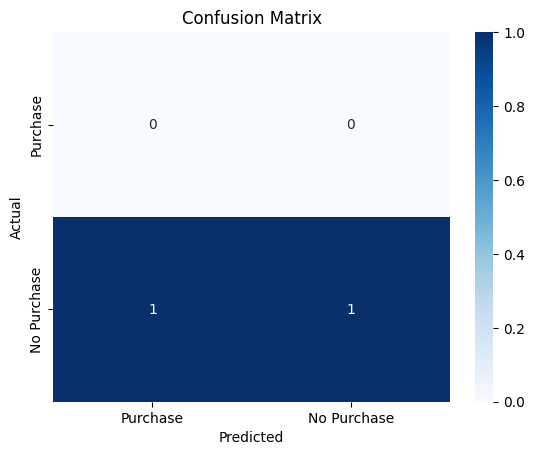

In [ ]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Purchase', 'No Purchase'], yticklabels=['Purchase', 'No Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


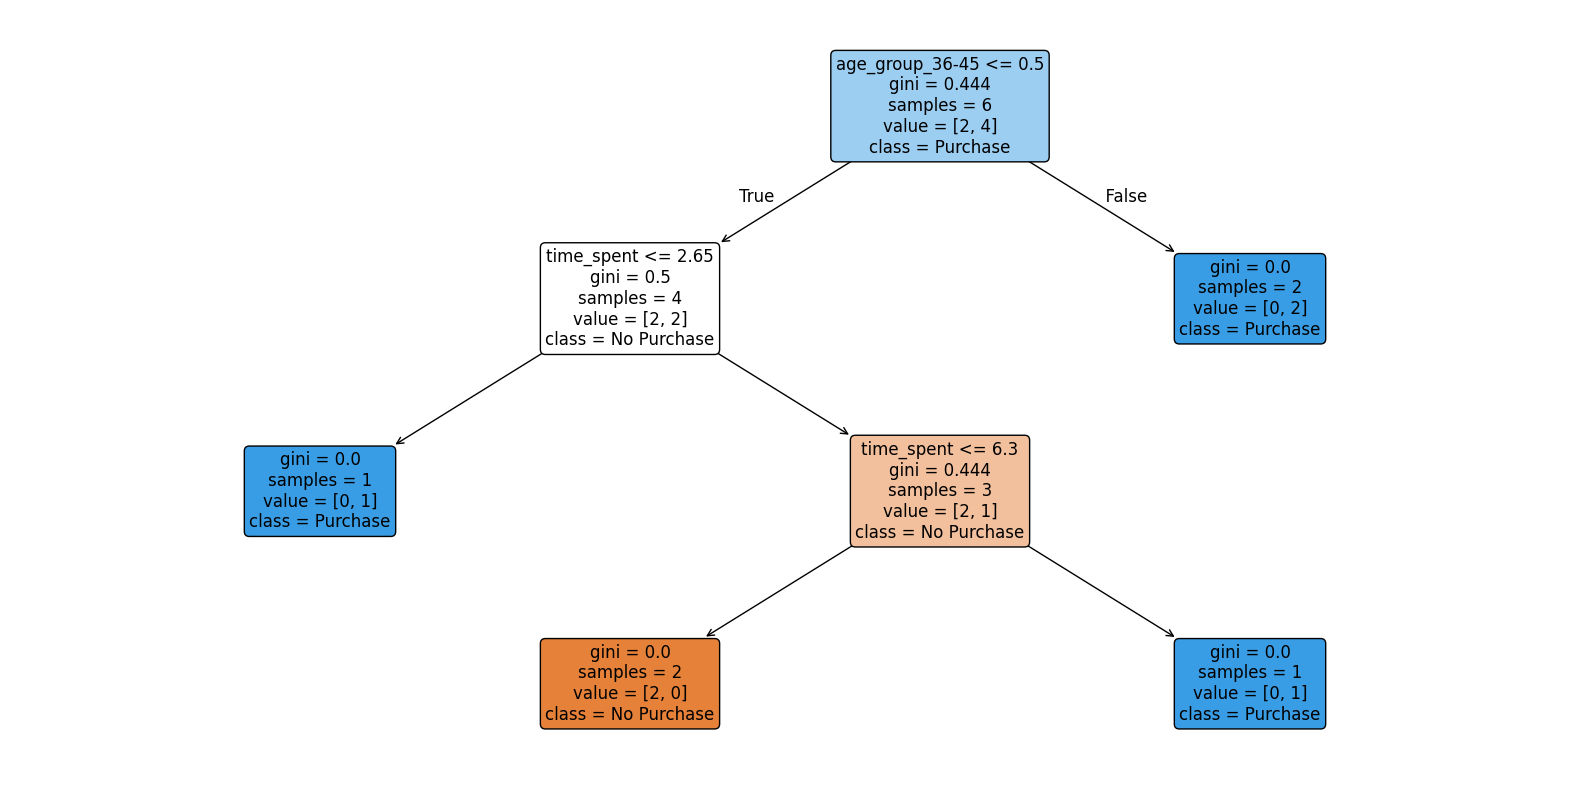

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], rounded=True, fontsize=12)
plt.show()


In [ ]:
# Function to predict based on user input
def predict_purchase(num_visits, time_spent, age_group, product_category):
    # Create a dictionary for the user input
    user_data = {
        'num_visits': [num_visits],
        'time_spent': [time_spent],
        'age_group_26-35': [1 if age_group == '26-35' else 0],
        'age_group_36-45': [1 if age_group == '36-45' else 0],
        'product_category_Fashion': [1 if product_category == 'Fashion' else 0],
        'product_category_Books': [1 if product_category == 'Books' else 0],
        'product_category_Electronics': [1 if product_category == 'Electronics' else 0]
    }
    # Convert to DataFrame
    user_df = pd.DataFrame(user_data)
    # Ensure the columns in the user input match the training data
    missing_cols = set(X.columns) - set(user_df.columns)
    for col in missing_cols:
        user_df[col] = 0  # Add missing columns and set them to 0
    # Reorder columns to match the training set
    user_df = user_df[X.columns]
    # Make the prediction
    prediction = dt_classifier.predict(user_df)
    if prediction[0] == 1:
        print("The customer is likely to make a purchase.")
    else:
        print("The customer is unlikely to make a purchase.")
# Example of how to use the function
predict_purchase(num_visits=7, time_spent=4.5, age_group='26-35', product_category='Electronics')

The customer is likely to make a purchase.
